## CS 495/595 Data Science with Python
### Take Home Examination
### Due Date:   4/5/2018



### Exercise 1: Generate fake data  using linear regression model with known parameters and some noise as shown below.



In [1]:
import numpy as np
# simulate a fake normal distribution values with given mean and standard deviation.
mean, stdDev = 5, 7
N = 1000 # number of samples to generate
x_1 = np.random.normal(mean, stdDev, N)
# generate normal noise with mean as 0 and standard deviation of $2$
trueError = np.random.normal(0, 2, N)
# beta parameters used for generating the data
trueBeta0 = 1.1 
trueBeta1 = -8.2 
# generate data 
y = trueBeta0 + trueBeta1 * x_1 + trueError

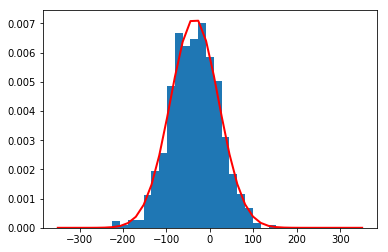

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
binedges=np.linspace(-350,350, 40)

plt.hist(y, bins=binedges, normed=True)

p = mlab.normpdf(binedges, np.mean(y), np.std(y))
plt.plot(binedges, p, 'r', linewidth=2)
plt.show()


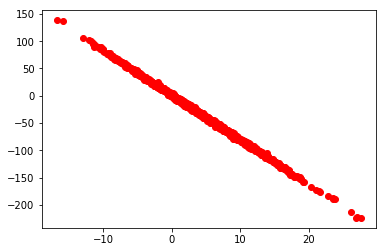

In [3]:
plt.scatter(x_1,y,color='r')
plt.show()

[ 1.08547659 -8.19576059]


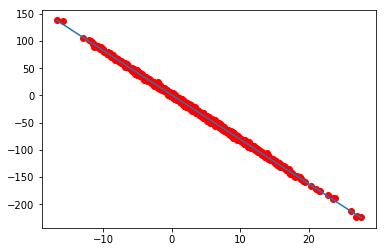

In [4]:
Xt = np.vstack((np.ones(len(x_1)), x_1))
X = Xt.T
y_new = y.T
XtX = np.dot(X.T, X)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X.T, y_new)
b = np.dot(XtX_inv, Xty)
print(b)
plt.plot(x_1, y, 'ro')
# for plotting regression line use two points
y3 =  b[0] + b[1]*min(x_1)
y10 = b[0] + b[1]*max(x_1)
plt.plot([min(x_1), max(x_1)], [y3, y10]) 
plt.show()

(1000,) (1000, 1)


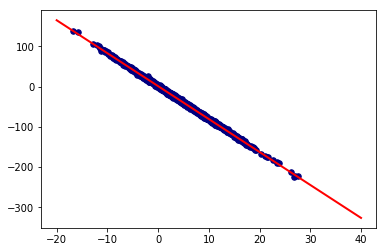

In [5]:
from sklearn import linear_model

X = x_1[:, np.newaxis] # another way to convert row to col vector
y_new1 = y[:, np.newaxis]
print(np.shape(y), np.shape(X))
plt.scatter(x_1, y_new1, color='navy', s=30, marker='o')
regr = linear_model.LinearRegression()
regr.fit(X, y_new1)
# to plot regression line create sample x data and estimate y using prediction
x_plot = np.linspace(-20, 40, 10)
X_plot = x_plot[:, np.newaxis]
y_plot = regr.predict(X_plot)
plt.plot(x_plot, y_plot, color='red',linewidth=2)
plt.show()

In [6]:
Z = np.power(x_1, 2)


In [7]:
Y_z= y + Z

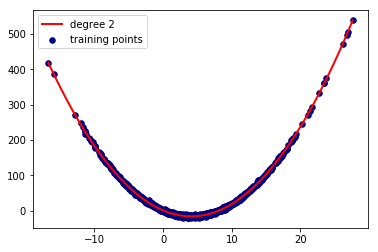

In [8]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)
XP = poly.fit_transform(X)
x1_plot = np.linspace(min(x_1), max(x_1), 50)
X1_plot = x1_plot[:, np.newaxis]
XP_plot = poly.fit_transform(X1_plot)
plt.scatter(x_1, Y_z, color='navy', s=30, marker='o', label="training points")
regr = linear_model.LinearRegression()
regr.fit(XP, Y_z)
y1_plot = regr.predict(XP_plot) # estimate y for test data for plotting
plt.plot(x1_plot, y1_plot, color='red', linewidth=2,label="degree %d" % degree)
plt.legend(loc='best')
plt.show()


In [9]:
#From the above figure we can see that it is a parabola since the relation is not linear

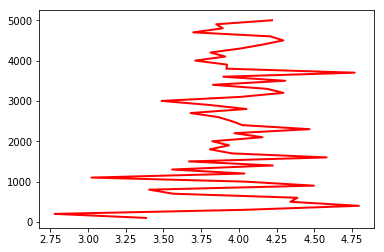

In [10]:
#depends on x_1 only
samples = [x for x in range(100,5001,100)]
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
meansqr=[]
for N in samples: 
# simulate a fake normal distribution values with given mean and standard deviation.
    mean, stdDev = 5, 7
    #N = 1000 # number of samples to generate
    x_1 = np.random.normal(mean, stdDev, N)
# generate normal noise with mean as 0 and standard deviation of $2$
    trueError = np.random.normal(0, 2, N)
# beta parameters used for generating the data
    trueBeta0 = 1.1 
    trueBeta1 = -8.2 
# generate data 
    y = trueBeta0 + trueBeta1 * x_1 + trueError
    X_train, X_test, y_train, y_test = train_test_split(
    x_1, y, test_size=0.2, random_state=42)
    X_new = X_train[:, np.newaxis]
    Y_new = y_train[:, np.newaxis]
    regr = linear_model.LinearRegression()
    regr.fit(X_new, Y_new)
    X_plot = X_test[:, np.newaxis]
    y_prediction = regr.predict(X_plot)
    meansqr.append(mean_squared_error(y_test,y_prediction))
plt.plot(meansqr, samples, color='red',linewidth=2)  
plt.show()


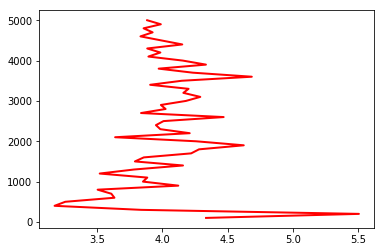

In [11]:
#depending on x_1 as well as Z

meansqr1=[]
for N in samples: 
# simulate a fake normal distribution values with given mean and standard deviation.
    mean, stdDev = 5, 7
    #N = 1000 # number of samples to generate
    x_1 = np.random.normal(mean, stdDev, N)
# generate normal noise with mean as 0 and standard deviation of $2$
    trueError = np.random.normal(0, 2, N)
    z= x_1*x_1
# beta parameters used for generating the data
    trueBeta0 = 1.1 
    trueBeta1 = -8.2 
# generate data 
    y = trueBeta0 + trueBeta1 * x_1 + trueError + z
    X_train, X_test, y_train, y_test = train_test_split(
    x_1, y, test_size=0.2, random_state=42)
    X_new = X_train[:, np.newaxis]
    Y_new = y_train[:, np.newaxis]
    degree = 2
    poly = PolynomialFeatures(degree)
    XP = poly.fit_transform(X_new)
    X_plot = X_test[:, np.newaxis]
    XP_plot = poly.fit_transform(X_plot)
    regr = linear_model.LinearRegression()
    regr.fit(XP, Y_new)
    y_prediction = regr.predict(XP_plot)
    meansqr1.append(mean_squared_error(y_test,y_prediction))
plt.plot(meansqr1, samples, color='red',linewidth=2)  
plt.show()


<ul>
<li> Plot the histogram of the fake data.  Use mlab.normpdf to add best-fit pdf. Also, make a scatter plot beween x_1 and y. 
<li> Build a regression model from scratch and demonstrate that it recovers the true values of $\beta$s. Repeat the exercise with Scikit Package.
<li>Create a new variable, Z, that is equal to x_1^2. Include this as one of the predictors in your model. See what happens when you fit a model that depends on x_1 only and then also on Z. For this exercise you will evaluate the model for different sample sizes starting from  100 to 5000 with an increment of 100 samples. You will split your samples into training and test set (80%/20%) using  "train_test_split" function available in the Scikit package. Plot the mean square error of the training set and of the test set versus sample sizes for both models (one with x_1 only and the other that includes Z). 


### Exercise 2: For this exercise you will use real estate sale data for Brooklyn available in the resource folder on Blackboard (rollingsales_brooklyn). 

<ul>
<li>Analyze sales using regression with any predictors you feel are relevant. Justify why regression was appropriate to use.
<li>Visualize the coefficients and fitted model.
<li>Predict the neighborhood using a k-NN classifier. Be sure to withhold a subset of the data for testing. Find the variables and the k that give you the lowest prediction error.
<li>Report and visualize your findings.
<li>Describe any decisions that could be made or actions that could be taken from this analysis.
</ul>

In [12]:

'''
import pandas as pd
df = pd.read_csv('rollingsales_brooklyn.csv')
sp = df['sale.price.n']
sale = np.array(sp)
pred = df['gross.sqft']
zipc = np.array(pred)
'''

"\nimport pandas as pd\ndf = pd.read_csv('rollingsales_brooklyn.csv')\nsp = df['sale.price.n']\nsale = np.array(sp)\npred = df['gross.sqft']\nzipc = np.array(pred)\n"

In [13]:
'''
from sklearn import linear_model
X = sale[:, np.newaxis] # another way to convert row to col vector
y = zipc[:, np.newaxis]
print(np.shape(y), np.shape(X))
plt.scatter(sale, zipc, color='navy', s=30, marker='o')
regr = linear_model.LinearRegression()
regr.fit(X, y)
# to plot regression line create sample x data and estimate y using prediction
x_plot = np.linspace(min(sale),max(sale) , 100)
X_plot = x_plot[:, np.newaxis]
y_plot = regr.predict(X_plot)
plt.plot(x_plot, y_plot, color='teal',linewidth=2)
plt.show()
'''

"\nfrom sklearn import linear_model\nX = sale[:, np.newaxis] # another way to convert row to col vector\ny = zipc[:, np.newaxis]\nprint(np.shape(y), np.shape(X))\nplt.scatter(sale, zipc, color='navy', s=30, marker='o')\nregr = linear_model.LinearRegression()\nregr.fit(X, y)\n# to plot regression line create sample x data and estimate y using prediction\nx_plot = np.linspace(min(sale),max(sale) , 100)\nX_plot = x_plot[:, np.newaxis]\ny_plot = regr.predict(X_plot)\nplt.plot(x_plot, y_plot, color='teal',linewidth=2)\nplt.show()\n"

In [56]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [57]:
data = pd.read_csv('rollingsales_brooklyn.csv',parse_dates=True, index_col=0)

#cleaning the data
df1 = data[['neighborhood']]
dataneigh = np.array(df1)
print(len(dataneigh[:,0]))
neibr = pd.factorize(dataneigh[:,0])

23373


In [58]:
data=data.drop('neighborhood', axis=1)
data['neighborhood']=neibr[0]
data=data.drop('building.class.category', axis=1)
data=data.drop('ease.ment', axis=1)
data=data.drop('apart.ment.number', axis=1)
data=data.drop('sale.price', axis=1)
data=data.drop('address', axis=1)
data=data.drop('building.class.at.present', axis=1)
data=data.drop('building.class.at.time.of.sale', axis=1)
data=data.drop('tax.class.at.present',axis=1)
data=data.drop('gross.square.feet',axis=1)
data=data.drop('land.square.feet',axis=1)
data.sale_price_n=data.sale_price_n.astype(int)
data.land_sqft =data.land_sqft.astype(int)
data['sale.date'] = pd.to_datetime(data['sale.date'])
data["property_age"] = data["sale.date"].dt.year - data['year.built']
data=data.drop('sale.date', axis=1)

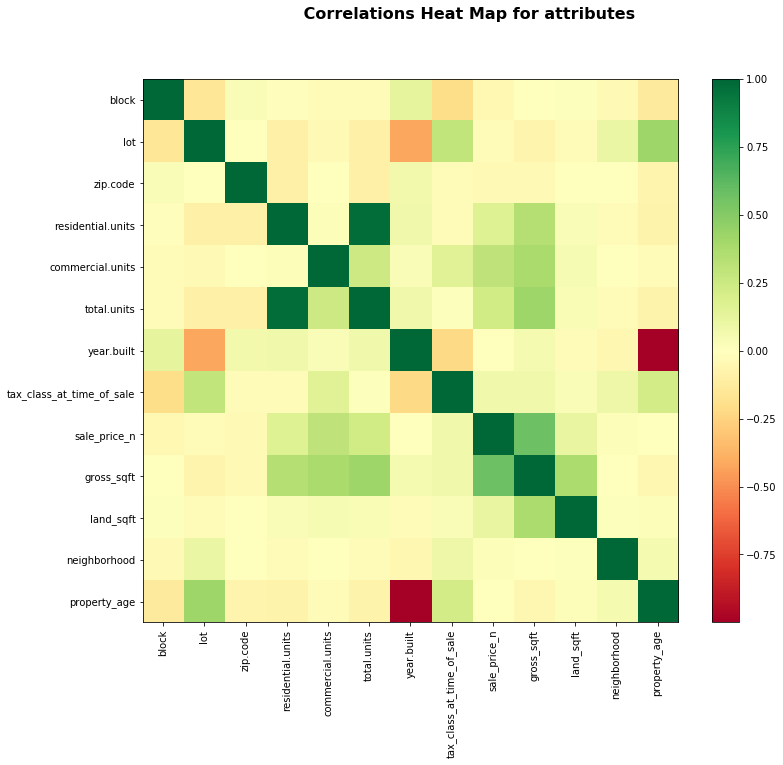

In [17]:
corltn=data.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corltn, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')
plt.show()

In [18]:
# the graph shows that for gross_sqft has highest correlation with sale price.

In [19]:
sale_price=data["sale_price_n"]
gross_sqft=data["gross_sqft"]
print(sale_price.shape,gross_sqft.shape)

(23373,) (23373,)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(gross_sqft, sale_price, test_size=0.2, random_state=42)
X_trainsales = X_train[:, np.newaxis]# another way to convert vector to matrix
X_testsales = X_test[:, np.newaxis]
Y_trainsales = Y_train[:, np.newaxis]
Y_testsales = Y_test[:, np.newaxis]


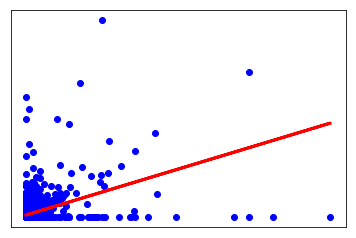

Coefficeints, the fitted model  [[ 71.24805171]]


In [21]:
regr = linear_model.LinearRegression()
regr.fit(X_trainsales, Y_trainsales)
y_pred = regr.predict(X_testsales)
plt.scatter(X_testsales, Y_testsales,  color='blue')
plt.plot(X_testsales, y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
print("Coefficeints, the fitted model ",regr.coef_)

In [22]:
#Knn
tax_class_at_time_of_sale=data[["tax_class_at_time_of_sale","lot"]]
neighborhood=data["neighborhood"]
X_train, X_test, Y_train, Y_test = train_test_split(tax_class_at_time_of_sale, neighborhood, test_size=0.2, random_state=42)
X_trainsales = X_train
X_testsales = X_test
Y_trainsales = Y_train[:, np.newaxis]
Y_testsales = Y_test[:, np.newaxis]
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
accuracy = cross_val_score(knn, X_trainsales, Y_train, cv=10, scoring='accuracy')
print (accuracy)

[ 0.09583992  0.09143763  0.08488064  0.08781267  0.09898341  0.09061662
  0.09027405  0.08683927  0.09891892  0.09544469]


In [23]:
accuracy_array_data = []
karray_data = []
for k in range(3,100,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_trainsales, Y_train, cv=10, scoring='accuracy')
    accuracy_array_data.append(accuracy.mean())
    karray_data.append(k)
print(accuracy_array_data)
print(karray_data)

[0.092104780341907472, 0.10092881004506871, 0.10530747722294456, 0.10733884390214081, 0.10994640180454245, 0.11310034970385401, 0.11349491460117785, 0.1135816110381576, 0.1168061849313724, 0.11849908101931816, 0.1201063735196832, 0.1212219848816154, 0.12073858123176942, 0.12105328838944032, 0.12272941457106983, 0.12159803210064841, 0.1209247420793171, 0.12135172362741942, 0.12140332936034318, 0.12044681900025116, 0.12140278274341507, 0.12115222049282867, 0.12087159497930015, 0.12167383371845664, 0.11909753835594003, 0.11883849683394158, 0.11867290994611387, 0.11808313310222847, 0.11786969096960849, 0.1181331709060474, 0.1177127980426141, 0.11733398195608388, 0.11513940282590038, 0.11513908394523749, 0.1176391946734561, 0.11598183258143631, 0.11597389090821056, 0.11651236942117889, 0.1173221016095175, 0.11470203117954818, 0.11357686820028785, 0.11433416714816842, 0.1144956395004266, 0.11465319186681769, 0.1135818229346643, 0.1133201275280207, 0.11491893787851153, 0.11465822856796866, 0.

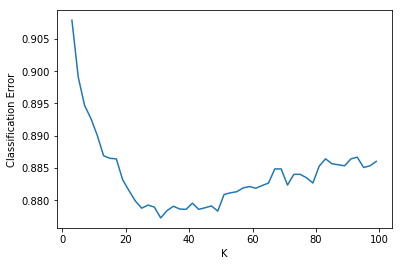

Optimal K is 31 


In [24]:
class_error = 1.0 - np.array(accuracy_array_data)
plt.plot(karray_data, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()
minimumind = np.argmin(class_error)
OptimumK = karray_data[minimumind]
print ("Optimal K is %d " %  OptimumK)

In [25]:
# Use Optimal value of K for test set
knn = KNeighborsClassifier(n_neighbors=OptimumK)

# fitting the model
knn.fit(X_trainsales, Y_train)

# predict
pred = knn.predict(X_testsales)

# evaluate accuracy
print(accuracy_score(Y_test, pred))

0.121497326203


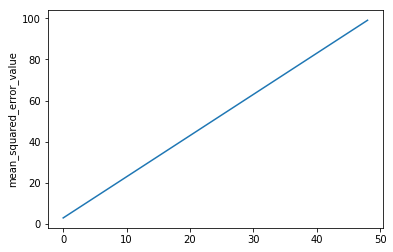

In [26]:
plt.plot(karray_data)
plt.ylabel('mean_squared_error_value')
plt.show()

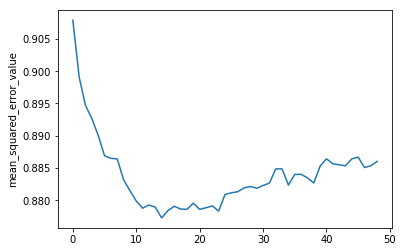

In [27]:
plt.plot(class_error)
plt.ylabel('mean_squared_error_value')
plt.show()

### Exercise 3: For this exercise you will use financial data from Yahoo web site. 

<ul>
<li>Get the Data: Go to Yahoo! Finance and download daily data for a stock that has at least eight years of data, making sure it goes from earlier to later. 
<li> Create the time series of daily log returns of the stock price. Note that log return at time $t$ is defined as $\log {S_t/S_{t-1}}$, where $S_t$ is price of asset at time $t$ and $S_{t-1}$ is price of asset at time $t-1$. Do the same for volume data (i.e., create the time series of daily log changes in volume).
<li> Next, set up a linear regression model that uses the past two returns to predict the next return. Run it and see if you can make any money with it. Try it for both stock returns and volumes. 
</ul>

In [42]:
finance = pd.read_csv('NVDA.csv',parse_dates=True, index_col=0)
print(finance.head())

#Price

print(finance['Adj Close'].shift(1).head(4))

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2009-04-08  11.08  11.44  10.99  11.41  10.572437  18291300
2009-04-09  11.70  12.08  11.61  12.04  11.156193  22610300
2009-04-13  11.89  11.90  11.39  11.65  10.794821  19190700
2009-04-14  11.49  12.00  11.44  11.72  10.859684  17799000
2009-04-15  11.31  11.44  10.91  11.39  10.553907  26134200
Date
2009-04-08          NaN
2009-04-09    10.572437
2009-04-13    11.156193
2009-04-14    10.794821
Name: Adj Close, dtype: float64


In [43]:
finance['Price']=np.log(finance['Adj Close'] / finance['Adj Close'].shift(1))
print(finance.head())

             Open   High    Low  Close  Adj Close    Volume     Price
Date                                                                 
2009-04-08  11.08  11.44  10.99  11.41  10.572437  18291300       NaN
2009-04-09  11.70  12.08  11.61  12.04  11.156193  22610300  0.053744
2009-04-13  11.89  11.90  11.39  11.65  10.794821  19190700 -0.032928
2009-04-14  11.49  12.00  11.44  11.72  10.859684  17799000  0.005991
2009-04-15  11.31  11.44  10.91  11.39  10.553907  26134200 -0.028561


In [44]:
finance=finance.fillna('0')
finance.head()

,Open,High,Low,Close,Adj Close,Volume,Price
Date,,,,,,,
2009-04-08,11.08,11.44,10.99,11.41,10.572437,18291300,0
2009-04-09,11.70,12.08,11.61,12.04,11.156193,22610300,0.0537444
2009-04-13,11.89,11.90,11.39,11.65,10.794821,19190700,-0.0329283
2009-04-14,11.49,12.00,11.44,11.72,10.859684,17799000,0.00599073
2009-04-15,11.31,11.44,10.91,11.39,10.553907,26134200,-0.0285611


In [45]:
#Volume
print(finance['Volume'].head())

Date
2009-04-08    18291300
2009-04-09    22610300
2009-04-13    19190700
2009-04-14    17799000
2009-04-15    26134200
Name: Volume, dtype: int64


In [46]:
print(finance['Volume'].shift(1).head())

Date
2009-04-08           NaN
2009-04-09    18291300.0
2009-04-13    22610300.0
2009-04-14    19190700.0
2009-04-15    17799000.0
Name: Volume, dtype: float64


In [47]:
finance['LVolume']=np.log(finance['Volume'] / finance['Volume'].shift(1))
print(finance.head())

             Open   High    Low  Close  Adj Close    Volume       Price  \
Date                                                                      
2009-04-08  11.08  11.44  10.99  11.41  10.572437  18291300           0   
2009-04-09  11.70  12.08  11.61  12.04  11.156193  22610300   0.0537444   
2009-04-13  11.89  11.90  11.39  11.65  10.794821  19190700  -0.0329283   
2009-04-14  11.49  12.00  11.44  11.72  10.859684  17799000  0.00599073   
2009-04-15  11.31  11.44  10.91  11.39  10.553907  26134200  -0.0285611   

             LVolume  
Date                  
2009-04-08       NaN  
2009-04-09  0.211980  
2009-04-13 -0.163980  
2009-04-14 -0.075284  
2009-04-15  0.384103  


In [48]:
finance=finance.fillna('0')
finance.head()

,Open,High,Low,Close,Adj Close,Volume,Price,LVolume
Date,,,,,,,,
2009-04-08,11.08,11.44,10.99,11.41,10.572437,18291300,0,0
2009-04-09,11.70,12.08,11.61,12.04,11.156193,22610300,0.0537444,0.21198
2009-04-13,11.89,11.90,11.39,11.65,10.794821,19190700,-0.0329283,-0.16398
2009-04-14,11.49,12.00,11.44,11.72,10.859684,17799000,0.00599073,-0.0752835
2009-04-15,11.31,11.44,10.91,11.39,10.553907,26134200,-0.0285611,0.384103


In [49]:
# Linear regression for price
finance['Price_Yes']=finance['Price'].shift(1)
finance['Price_DayYes']=finance['Price_Yes'].shift(1)
finance=finance.fillna('0')
print(finance.head())

             Open   High    Low  Close  Adj Close    Volume       Price  \
Date                                                                      
2009-04-08  11.08  11.44  10.99  11.41  10.572437  18291300           0   
2009-04-09  11.70  12.08  11.61  12.04  11.156193  22610300   0.0537444   
2009-04-13  11.89  11.90  11.39  11.65  10.794821  19190700  -0.0329283   
2009-04-14  11.49  12.00  11.44  11.72  10.859684  17799000  0.00599073   
2009-04-15  11.31  11.44  10.91  11.39  10.553907  26134200  -0.0285611   

              LVolume   Price_Yes Price_DayYes  
Date                                            
2009-04-08          0           0            0  
2009-04-09    0.21198           0            0  
2009-04-13   -0.16398   0.0537444            0  
2009-04-14 -0.0752835  -0.0329283    0.0537444  
2009-04-15   0.384103  0.00599073   -0.0329283  


In [50]:
pricex = finance.filter(items=['Price_Yes', 'Price_DayYes'])
pricey = finance['Price']


In [51]:
Xprice_train, Xprice_test, Yprice_train, Yprice_test = train_test_split(pricex, pricey, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Ypn_train=Yprice_train[:,np.newaxis]
regr.fit(Xprice_train, Ypn_train)
y_pred = regr.predict(Xprice_test)
print(y_pred[0:5])
print(Yprice_test[0:5])

[[ 0.00113215]
 [ 0.0009701 ]
 [ 0.00112878]
 [ 0.00119399]
 [ 0.00163924]]
Date
2016-03-30    0.0104008
2014-05-12    0.0289402
2010-08-27    0.0321308
2010-12-07     0.031878
2009-06-29            0
Name: Price, dtype: object


In [52]:
# Linear regression for volume
finance['Vol_Yes']=finance['LVolume'].shift(1)
finance['Vol_DayYes']=finance['Vol_Yes'].shift(1)
finance=finance.fillna('0')
print(finance.head(6))

             Open   High    Low  Close  Adj Close    Volume       Price  \
Date                                                                      
2009-04-08  11.08  11.44  10.99  11.41  10.572437  18291300           0   
2009-04-09  11.70  12.08  11.61  12.04  11.156193  22610300   0.0537444   
2009-04-13  11.89  11.90  11.39  11.65  10.794821  19190700  -0.0329283   
2009-04-14  11.49  12.00  11.44  11.72  10.859684  17799000  0.00599073   
2009-04-15  11.31  11.44  10.91  11.39  10.553907  26134200  -0.0285611   
2009-04-16  11.60  11.82  11.16  11.68  10.822620  25969300   0.0251423   

               LVolume   Price_Yes Price_DayYes    Vol_Yes Vol_DayYes  
Date                                                                   
2009-04-08           0           0            0          0          0  
2009-04-09     0.21198           0            0          0          0  
2009-04-13    -0.16398   0.0537444            0    0.21198          0  
2009-04-14  -0.0752835  -0.0329283    0

In [53]:
volume_data_x = finance.filter(items=['Vol_Yes', 'Vol_DayYes'])
volume_data_y = finance['LVolume']

In [54]:
Xv_train, Xv_test, Yv_train, Yv_test = train_test_split(volume_data_x, volume_data_y, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Yvn_train=Yv_train[:,np.newaxis]

regr.fit(Xv_train, Yvn_train)
yv_pred = regr.predict(Xv_test)
print(yv_pred[0:5])
print(Yv_test[0:5])

[[-0.01752209]
 [-0.16833284]
 [ 0.00579064]
 [ 0.07494775]
 [ 0.05364327]]
Date
2016-03-30      0.364113
2014-05-12       -0.5874
2010-08-27      0.477826
2010-12-07      0.851028
2009-06-29   -0.00761714
Name: LVolume, dtype: object
